# Preprocessing

## Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
3,2018-01-01,United Airlines,Fort Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1,1,Jan,1


In [3]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [4]:
df.WEEKDAY.value_counts()

0    1065230
4    1055156
3    1047643
2    1022760
1    1010249
6    1006194
5     864585
Name: WEEKDAY, dtype: int64

## Preprocessing

Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 358 total destinations.

In [5]:
top_cities = df.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,409000
1,Atlanta,385942
2,New York,287618
3,Dallas-Fort Worth,272075
4,Denver,233410


In [6]:
top_cities.DEST.unique()

array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Denver',
       'Houston', 'Charlotte', 'Los Angeles', 'Washington',
       'San Francisco', 'Phoenix', 'Las Vegas', 'Minneapolis', 'Detroit',
       'Boston', 'Seattle', 'Newark', 'Orlando', 'Philadelphia',
       'Salt Lake City'], dtype=object)

In [7]:
city_list = top_cities['DEST'].tolist()
city_list

['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Denver',
 'Houston',
 'Charlotte',
 'Los Angeles',
 'Washington',
 'San Francisco',
 'Phoenix',
 'Las Vegas',
 'Minneapolis',
 'Detroit',
 'Boston',
 'Seattle',
 'Newark',
 'Orlando',
 'Philadelphia',
 'Salt Lake City']

In [8]:
boolean_series = df.DEST.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0
3,2018-01-01,United Airlines,Fort Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0,0
6,2018-01-01,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,Jan,0,0


In [9]:
dfm.shape

(4057931, 21)

In [10]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4057931 entries, 0 to 7213445
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_DELAY            float64       
 6   TAXI_OUT             float64       
 7   WHEELS_OFF           int64         
 8   WHEELS_ON            int64         
 9   TAXI_IN              float64       
 10  CRS_ARR_TIME         int64         
 11  ARR_DELAY            float64       
 12  CRS_ELAPSED_TIME     float64       
 13  ACTUAL_ELAPSED_TIME  float64       
 14  AIR_TIME             float64       
 15  DISTANCE             float64       
 16  DAY                  int64         
 17  MONTH                int64         
 18  MONTH_AB             object        
 19  FLIGHT_STATUS        

> Dropping unwanted features

In [11]:
dfm.drop(columns=['FL_DATE', 'MONTH_AB'],inplace = True)

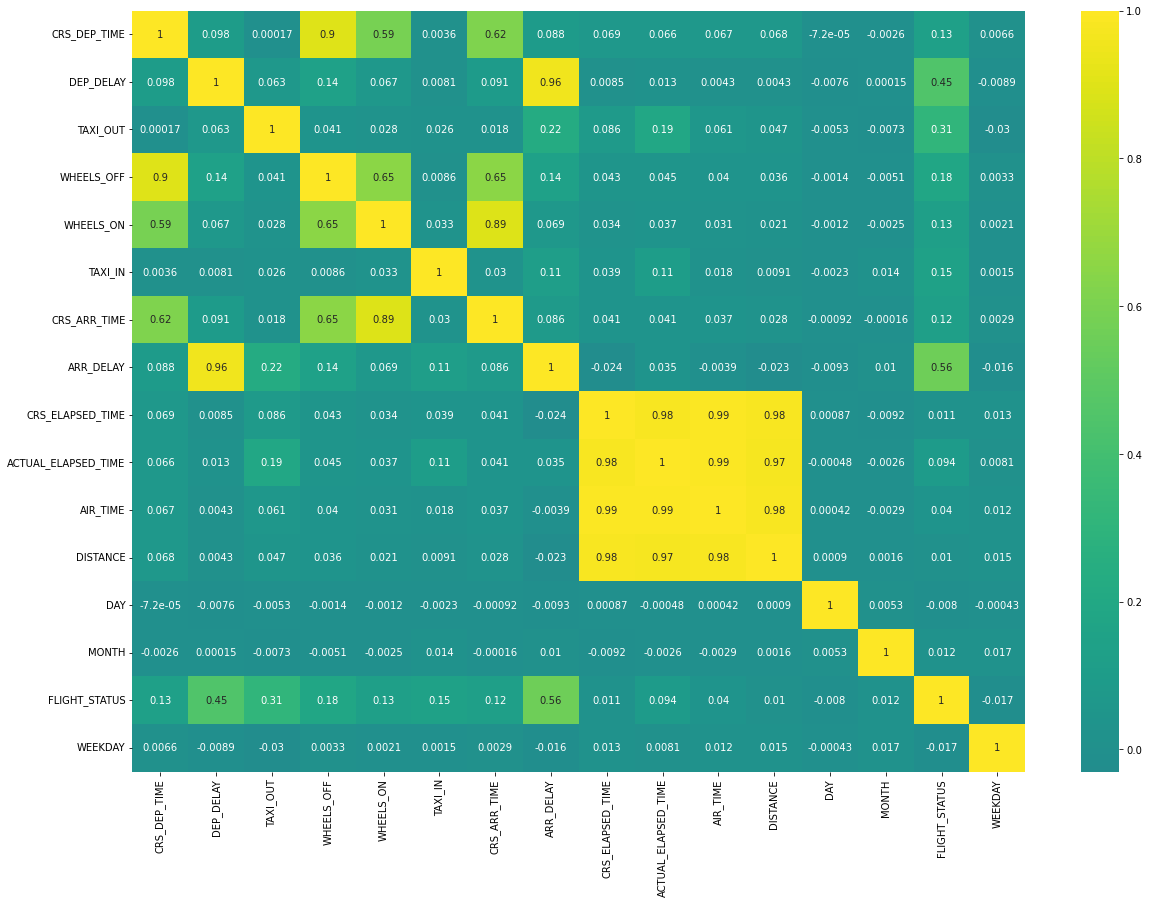

In [12]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)

### FEATURES HAVING COLLINEARITY
* DEP_DELAY AND ARR_DELAY ARE HAVING COLLINEARITY
* CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DIOSTANCE ARE HAVING COLLINEARITY
* CRS_DEPTIME AND WHEELS_OFF 
* WHEELS_ON AND CRS_ARRTIME


In [13]:
# lets keep only one Feature to decrease dimensions and reduce collinearity
dfm.drop(['ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE'],axis = 1, inplace = True)
# others are categorical features so lets remove remaining after analysis

In [14]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4057931 entries, 0 to 7213445
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   OP_CARRIER        object 
 1   ORIGIN            object 
 2   DEST              object 
 3   CRS_DEP_TIME      int64  
 4   DEP_DELAY         float64
 5   TAXI_OUT          float64
 6   WHEELS_OFF        int64  
 7   WHEELS_ON         int64  
 8   TAXI_IN           float64
 9   CRS_ARR_TIME      int64  
 10  ARR_DELAY         float64
 11  CRS_ELAPSED_TIME  float64
 12  DAY               int64  
 13  MONTH             int64  
 14  FLIGHT_STATUS     int64  
 15  WEEKDAY           int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 526.3+ MB


In [15]:
dfm['FLIGHT_STATUS'].value_counts()

0    2932183
1    1125748
Name: FLIGHT_STATUS, dtype: int64

<AxesSubplot:>

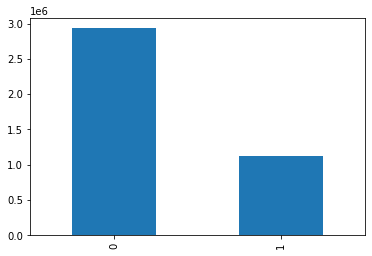

In [16]:
dfm['FLIGHT_STATUS'].value_counts().plot(kind = 'bar')

## Categoricals

* OP_CARRIER = 18 airlines
* ORIGIN = 20 cities
* DEST = 20 cities
* CRS_DEP_TIME = 4 quarters
* CRS_ARR_TIME = 4 quarters
* MONTH = 12 months
* FLIGHT_STATUS = 2 categories (already dealt with)
* WEEKDAY = 7 days (from 0 to 6)

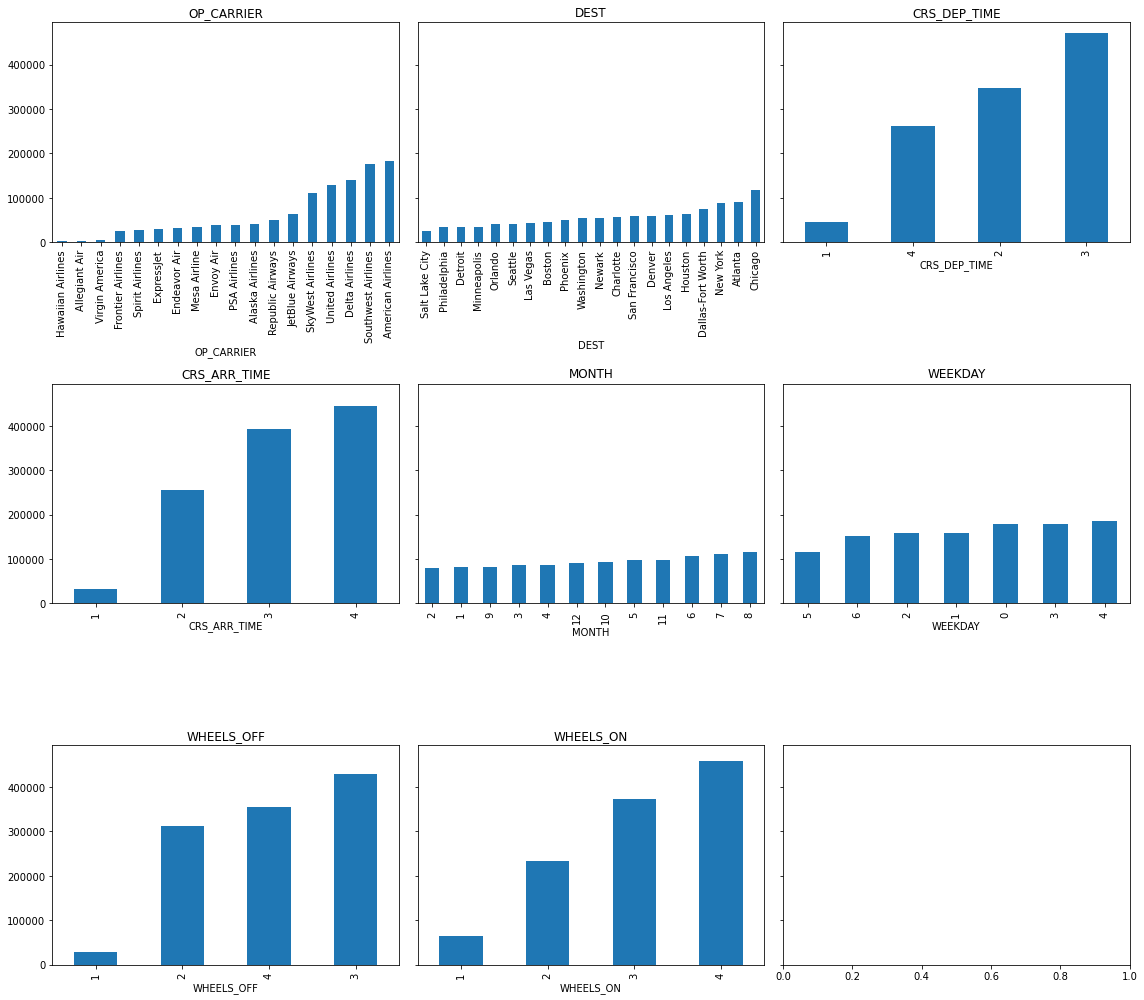

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,14), sharey=True)

categoricals = ['OP_CARRIER', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'MONTH', 'WEEKDAY', 'WHEELS_OFF', 'WHEELS_ON']

for col, ax in zip(categoricals, axes.flatten()):
    (dfm.groupby(col).sum()['FLIGHT_STATUS'].sort_values().plot.bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()

#### Lets label encode our DESTINATION data because in our EDA also we have seen some destinations are having different avg delay minutes, so lets label encode based on that

In [18]:
test_4 = dfm[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4['LABEL_VALUES'] = test_4['ARR_DELAY'].apply(lambda x : np.round(x))

In [19]:
test_4

,DEST,ARR_DELAY,LABEL_VALUES
0,Atlanta,2.921392,3.0
1,Boston,8.679785,9.0
2,Charlotte,3.035853,3.0
3,Chicago,7.154714,7.0
4,Dallas-Fort Worth,6.316821,6.0
5,Denver,3.132484,3.0
6,Detroit,1.838890,2.0
7,Houston,4.236595,4.0
8,Las Vegas,3.545835,4.0
9,Los Angeles,1.921933,2.0


In [20]:
dict1 = dict(zip(test_4['DEST'].to_list(),test_4['LABEL_VALUES'].to_list()))

In [21]:
dfm['DEST'] = dfm['DEST'].map(dict1)

In [22]:
dfm['DEST'].unique()

array([ 3.,  9.,  7.,  4., 17.,  2.,  5.,  1.,  6.])

In [23]:
OP_CARRIER_dummies = pd.get_dummies(dfm['OP_CARRIER'], prefix='OP_CARRIER', drop_first=True)
CRS_DEP_TIME_dummies = pd.get_dummies(dfm['CRS_DEP_TIME'], prefix='CRS_DEP_TIME', drop_first=True)
CRS_ARR_TIME_dummines = pd.get_dummies(dfm['CRS_ARR_TIME'], prefix='CRS_ARR_TIME', drop_first=True) 
MONTH_dummies = pd.get_dummies(dfm['MONTH'], prefix='MONTH', drop_first=True)
WEEKDAY_dummies = pd.get_dummies(dfm['WEEKDAY'], prefix='WEEKDAY', drop_first=True)

In [24]:
dfm = dfm.drop(['OP_CARRIER', 'ORIGIN', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'MONTH', 'WEEKDAY', 'WHEELS_OFF', 'WHEELS_ON', 'ARR_DELAY', 'TAXI_IN', 'TAXI_OUT'], axis=1)

In [25]:
dfm = pd.concat([dfm, OP_CARRIER_dummies, CRS_DEP_TIME_dummies, CRS_ARR_TIME_dummines, MONTH_dummies, WEEKDAY_dummies], axis=1)


In [26]:
dfm.shape

(4057931, 45)

In [27]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4057931 entries, 0 to 7213445
Data columns (total 45 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   DEST                           float64
 1   DEP_DELAY                      float64
 2   CRS_ELAPSED_TIME               float64
 3   DAY                            int64  
 4   FLIGHT_STATUS                  int64  
 5   OP_CARRIER_Allegiant Air       uint8  
 6   OP_CARRIER_American Airlines   uint8  
 7   OP_CARRIER_Delta Airlines      uint8  
 8   OP_CARRIER_Endeavor Air        uint8  
 9   OP_CARRIER_Envoy Air           uint8  
 10  OP_CARRIER_ExpressJet          uint8  
 11  OP_CARRIER_Frontier Airlines   uint8  
 12  OP_CARRIER_Hawaiian Airlines   uint8  
 13  OP_CARRIER_JetBlue Airways     uint8  
 14  OP_CARRIER_Mesa Airline        uint8  
 15  OP_CARRIER_PSA Airlines        uint8  
 16  OP_CARRIER_Republic Airways    uint8  
 17  OP_CARRIER_SkyWest Airlines    uint8  
 18  OP

In [28]:
dfm.isna().sum()

DEST                             0
DEP_DELAY                        0
CRS_ELAPSED_TIME                 0
DAY                              0
FLIGHT_STATUS                    0
OP_CARRIER_Allegiant Air         0
OP_CARRIER_American Airlines     0
OP_CARRIER_Delta Airlines        0
OP_CARRIER_Endeavor Air          0
OP_CARRIER_Envoy Air             0
OP_CARRIER_ExpressJet            0
OP_CARRIER_Frontier Airlines     0
OP_CARRIER_Hawaiian Airlines     0
OP_CARRIER_JetBlue Airways       0
OP_CARRIER_Mesa Airline          0
OP_CARRIER_PSA Airlines          0
OP_CARRIER_Republic Airways      0
OP_CARRIER_SkyWest Airlines      0
OP_CARRIER_Southwest Airlines    0
OP_CARRIER_Spirit Airlines       0
OP_CARRIER_United Airlines       0
OP_CARRIER_Virgin America        0
CRS_DEP_TIME_2                   0
CRS_DEP_TIME_3                   0
CRS_DEP_TIME_4                   0
CRS_ARR_TIME_2                   0
CRS_ARR_TIME_3                   0
CRS_ARR_TIME_4                   0
MONTH_2             

In [37]:
#dfm.to_csv("dfm.csv", index=False, encoding="utf-8")

In [42]:
dfm.shape

(4057931, 45)

## MODEL BUILDING

* I have tried so many times using ~5 million records but it is near impossible to train these many record so taking a sample from our parent dataset

In [43]:
df_sample = dfm.sample(n=1000000, random_state=42)

In [87]:
df_sample['FLIGHT_STATUS'].value_counts(normalize = True)

0    0.723107
1    0.276893
Name: FLIGHT_STATUS, dtype: float64

> Here we can observe the percentage of our target is same so llets continue with this dataset

In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_sample.drop('FLIGHT_STATUS', axis=1), df_sample['FLIGHT_STATUS'], test_size=0.3, random_state=42)

In [45]:
# Define the models to use
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier(),
          'XGBoost Classifier': XGBClassifier()}

### Logistic Regression

In [100]:
# Train and evaluate the models - Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
results_lr = {'Model': 'Logistic Regression', 
              'Accuracy': accuracy_score(y_test, y_pred_lr),
              'Precision': precision_score(y_test, y_pred_lr),
              'Recall': recall_score(y_test, y_pred_lr),
              'AUC': roc_auc_score(y_test, y_pred_lr)}
results_df = pd.DataFrame([results_lr])
results_df

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.875463,0.882872,0.63279,0.800391


### RandomForest

In [ ]:
# Train and evaluate the models - Random Forest Classifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)
results_rfc = {'Model': 'Random Forest Classifier', 
              'Accuracy': accuracy_score(y_test, y_pred_rfc),
              'Precision': precision_score(y_test, y_pred_rfc),
              'Recall': recall_score(y_test, y_pred_rfc),
              'AUC': roc_auc_score(y_test, y_pred_rfc)}
results_df = pd.concat([result_df,pd.DataFrame([results_rfc])])
result_df

In [52]:
pd.DataFrame([results_rfc])

,Model,Accuracy,Precision,Recall,AUC
0,Random Forest Classifier,0.87366,0.86992,0.637657,0.800651


### XGBoost

In [51]:
# Train and evaluate the models - XGBoost Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
results_xgb = {'Model': 'XGBoost Classifier', 
              'Accuracy': accuracy_score(y_test, y_pred_xgb),
              'Precision': precision_score(y_test, y_pred_xgb),
              'Recall': recall_score(y_test, y_pred_xgb),
              'AUC': roc_auc_score(y_test, y_pred_xgb)}
results_df_xgb = pd.DataFrame([results_xgb])
results_df_xgb

,Model,Accuracy,Precision,Recall,AUC
0,XGBoost Classifier,0.877973,0.896722,0.630556,0.801433


In [101]:
# Combine the results together to create a table
results_df = pd.concat([results_df, pd.DataFrame([results_rfc]), results_df_xgb])

In [102]:
results_df.reset_index(drop = True,inplace = True)

In [103]:
results_df

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.875463,0.882872,0.632790,0.800391
1,Random Forest Classifier,0.873660,0.869920,0.637657,0.800651
2,XGBoost Classifier,0.877973,0.896722,0.630556,0.801433


# CONCLUSION

### Every model is performing better among them we can consider XGBOOST as our model

In [104]:
result_df = results_df.round(2)

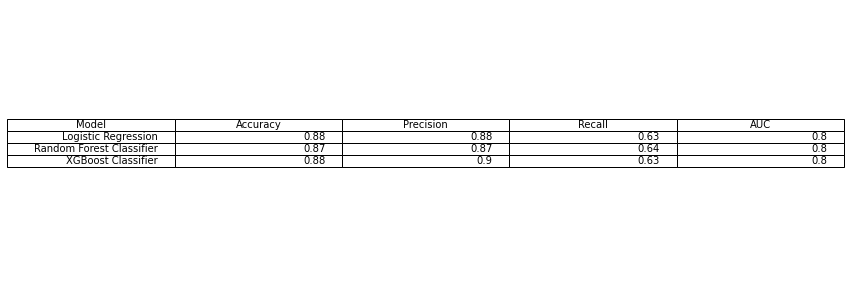

In [105]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=result_df.values, colLabels=result_df.columns, loc='center')
plt.show()

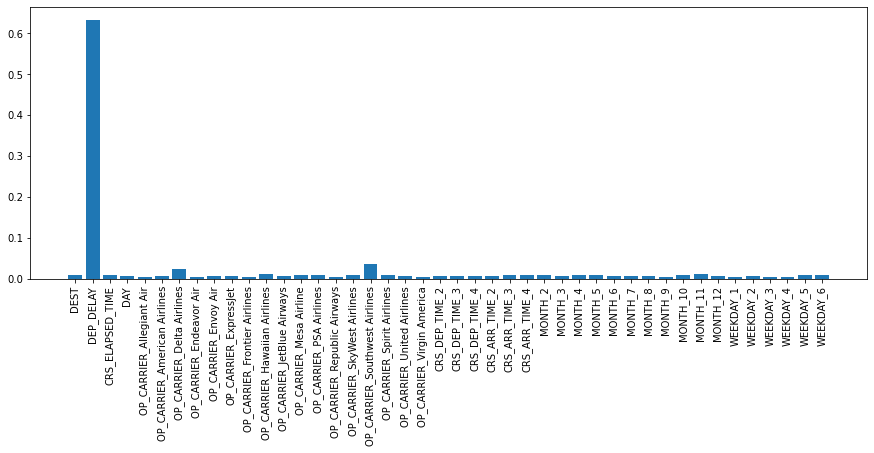

In [108]:
plt.figure(figsize = (15,5))
importances = model_xgb.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.bar(feature_names, importances)
plt.xticks(rotation='vertical')
plt.show()

In [111]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred_xgb)

In [118]:
conf

array([[211175,   6014],
       [ 30594,  52217]], dtype=int64)

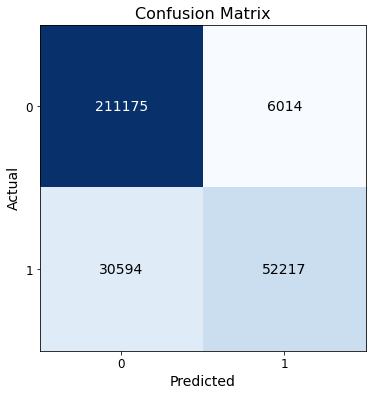

In [119]:

# Define class labels
class_labels = ['0', '1']

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(conf, cmap='Blues')

# Add colorbar

# Add labels to the plot
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, fontsize=12)
ax.set_yticklabels(class_labels, fontsize=12)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)

# Add text annotations
thresh = conf.max() / 2.
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        ax.text(j, i, format(conf[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf[i, j] > thresh else "black", fontsize=14)

# Add title to the plot
plt.title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()
